## Library Management with Differential Privacy

In this part of our project we are taking in three data frames that represents different levels of aggregation. We want to ask the following questions:

How many people in the CS department read some book A?

how many grad students read some book A?

and, how many grad students in the CS department read some book A?

We are using the Openmined PyDP library.

In [ ]:
pip install python-dp

In [ ]:
import pydp as dp  # by convention our package is to be imported as dp (for Differential Privacy!)
from pydp.algorithms.laplacian import BoundedSum, BoundedMean, Count, Max
import numpy as np
import pandas as pd
import statistics  # for calculating mean without applying differential privacy
import matplotlib.pyplot as plt
from collections import defaultdict, OrderedDict
import math

In [ ]:
EPSILON = math.log(3)

In [ ]:
# get data from our public github repo
df1 = pd.read_csv('https://raw.githubusercontent.com/Obosie/LibraryCSV/main/group_by_dept_study_level.csv', sep=",", names=["book_name", "department","study_level","read_count"])
df1 = df1.drop(labels=0, axis=0)
df1['read_count'] = df1['read_count'].astype(int)
df1.head(10)


,book_name,department,study_level,read_count
1,20000 Leagues Under the Sea,COMPUTER_SCIENCE,GRAD,27
2,20000 Leagues Under the Sea,COMPUTER_SCIENCE,UNDERGRAD,11
3,20000 Leagues Under the Sea,DANCE,GRAD,21
4,20000 Leagues Under the Sea,DANCE,UNDERGRAD,18
5,20000 Leagues Under the Sea,ECONOMICS,GRAD,18
6,20000 Leagues Under the Sea,ECONOMICS,UNDERGRAD,29
7,20000 Leagues Under the Sea,ENGLISH,GRAD,20
8,20000 Leagues Under the Sea,ENGLISH,UNDERGRAD,19
9,20000 Leagues Under the Sea,MATHEMATICS,GRAD,19
10,20000 Leagues Under the Sea,MATHEMATICS,UNDERGRAD,27


In [ ]:
df2 = pd.read_csv('https://raw.githubusercontent.com/Obosie/LibraryCSV/main/group_by_dept.csv',sep=",", names=["book_name", "department","read_count"])
df2 = df2.drop(labels=0, axis=0)
df2['read_count'] = df2['read_count'].astype(int)
df2.head(10)

,book_name,department,read_count
1,20000 Leagues Under the Sea,COMPUTER_SCIENCE,38
2,20000 Leagues Under the Sea,DANCE,39
3,20000 Leagues Under the Sea,ECONOMICS,47
4,20000 Leagues Under the Sea,ENGLISH,39
5,20000 Leagues Under the Sea,MATHEMATICS,46
6,20000 Leagues Under the Sea,POLITICAL_SCIENCE,46
7,20000 Leagues Under the Sea,PSYCHOLOGY,48
8,20000 Leagues Under the Sea,STATISTICS,39
9,"Age of Discontuinity, The",COMPUTER_SCIENCE,46
10,"Age of Discontuinity, The",DANCE,37


In [ ]:
df3 = pd.read_csv('https://raw.githubusercontent.com/Obosie/LibraryCSV/main/group_by_study_level.csv', sep=",", names=["book_name", "study_level", "read_count"])
df3 = df3.drop(labels=0, axis=0)
df3['read_count'] = df3['read_count'].astype(int)
df3.head(10)

,book_name,study_level,read_count
1,20000 Leagues Under the Sea,GRAD,172
2,20000 Leagues Under the Sea,UNDERGRAD,170
3,"Age of Discontuinity, The",GRAD,181
4,"Age of Discontuinity, The",UNDERGRAD,160
5,"Age of the Warrior, The",GRAD,189
6,"Age of the Warrior, The",UNDERGRAD,167
7,"Age of Wrath, The",GRAD,168
8,"Age of Wrath, The",UNDERGRAD,183
9,Aghal Paghal,GRAD,184
10,Aghal Paghal,UNDERGRAD,169


# Mean Calculations with Differential Privacy

with the BoundedMean function we add noise to the mean of the dataset.

Mean for Data set 1:  20.733708530805686
Private Mean for Data set 1:  20.811865093244773


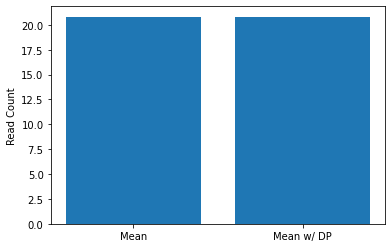

In [ ]:
# calculates mean without applying differential privacy
def df1_mean_read_count() -> float:
    non_dp_mean = statistics.mean(list(df1["read_count"]))
    return non_dp_mean
print("Mean for Data set 1: ", df1_mean_read_count())

# calculates mean applying differential privacy -- adding noise to the average of the dataset 
def df1_priv_mean(privacy_budget: int) -> float:
  x = BoundedMean(privacy_budget, 0, 1, 100)
  return x.quick_result(list(df1["read_count"]))

df1_dp_mean = df1_priv_mean(EPSILON)
print("Private Mean for Data set 1: ", df1_dp_mean)

plt.xlabel("")
plt.ylabel("Read Count")

ops = {
  "Mean": df1_mean_read_count(),
  "Mean w/ DP": df1_dp_mean,
}

plt.bar(list(ops.keys()), list(ops.values()))

plt.show()

Mean for Data set 2:  41.46741706161137
Private Mean for Data set 2:  41.49108995412724


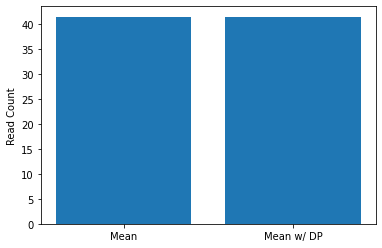

In [ ]:
def df2_mean_read_count() -> float:
    non_dp_mean = statistics.mean(list(df2["read_count"]))
    return non_dp_mean
print("Mean for Data set 2: ", df2_mean_read_count())

def df2_priv_mean(privacy_budget: int) -> float:
  x = BoundedMean(privacy_budget, 0, 1, 100)
  return x.quick_result(list(df2["read_count"]))

df2_dp_mean = df2_priv_mean(EPSILON)
print("Private Mean for Data set 2: ", df2_dp_mean)

plt.xlabel("")
plt.ylabel("Read Count")

ops = {
  "Mean": df2_mean_read_count(),
  "Mean w/ DP": df2_dp_mean,
}

plt.bar(list(ops.keys()), list(ops.values()))

plt.show()

Mean for Data set 3:  165.86966824644549
Private Mean for Data set 3:  164.9488776280048


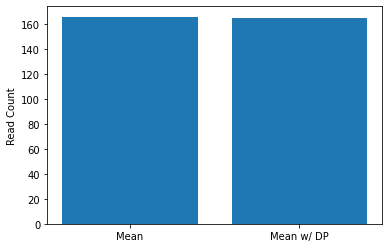

In [ ]:
def df3_mean_read_count() -> float:
    non_dp_mean = statistics.mean(list(df3["read_count"]))
    return non_dp_mean
print("Mean for Data set 3: ", df3_mean_read_count())

def df3_priv_mean(privacy_budget: int) -> float:
  x = BoundedMean(privacy_budget, 0, 50, 350)
  return x.quick_result(list(df3["read_count"]))

df3_dp_mean = df3_priv_mean(EPSILON)
print("Private Mean for Data set 3: ", df3_dp_mean)

plt.xlabel("")
plt.ylabel("Read Count")

ops = {
  "Mean": df3_mean_read_count(),
  "Mean w/ DP": df3_dp_mean,
}

plt.bar(list(ops.keys()), list(ops.values()))

plt.show()

# Sum calculation with Differential Privacy

with the BoundedSum function we add noise to the sum of the dataset.

Sum for Data Set 1 : 69997
Private Sum for Data Set 1: 69995


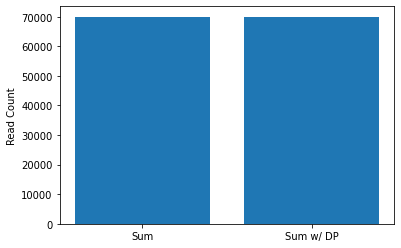

In [ ]:
# Function to calculate sum of read count eaten without applying differential privacy.
def df1_sum_read_count() -> int:
    return df1.sum()[3]

# Function to calculate sum of read count applying differential privacy.
def df1_private_sum(privacy_budget: float) -> int:
    x = BoundedSum(epsilon=EPSILON, lower_bound = 1, upper_bound = 50, dtype = 'int')

    return x.quick_result(list(df1["read_count"]))
print("Sum for Data Set 1 : " + str(df1_sum_read_count()))
df1_dp_sum = df1_private_sum(1)
print("Private Sum for Data Set 1: " + str(df1_dp_sum))

ops = {
  "Sum": df1_sum_read_count(),
  "Sum w/ DP": df1_dp_sum
}

plt.xlabel("")
plt.ylabel("Read Count")

plt.bar(list(ops.keys()), list(ops.values()))

plt.show()

Sum for Data Set 2 : 69997
Private Sum for Data Set 2: 70111


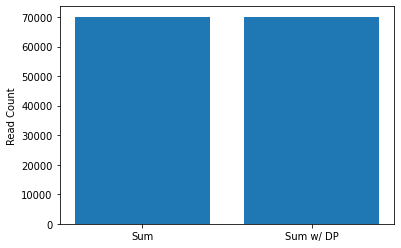

In [ ]:

# Function to calculate sum of read count eaten without applying differential privacy.
def df2_sum_read_count() -> int:
    return df2.sum()[2]

# Function to calculate sum of read count applying differential privacy.
def df2_private_sum(privacy_budget: float) -> int:
    x = BoundedSum(epsilon=EPSILON, lower_bound = 1, upper_bound = 100, dtype = 'int')
    #x = BoundedSum(privacy_budget, 0, 1, 100, dtype="float")
    return x.quick_result(list(df2["read_count"]))

print("Sum for Data Set 2 : " + str(df2_sum_read_count()))
df2_dp_sum = df2_private_sum(1)
print("Private Sum for Data Set 2: " + str(df2_dp_sum))

ops = {
  "Sum": df2_sum_read_count(),
  "Sum w/ DP": df2_dp_sum
}

plt.xlabel("")
plt.ylabel("Read Count")

plt.bar(list(ops.keys()), list(ops.values()))

plt.show()

Sum for Data Set 3 : 69997
Private Sum for Data Set 3: 70485


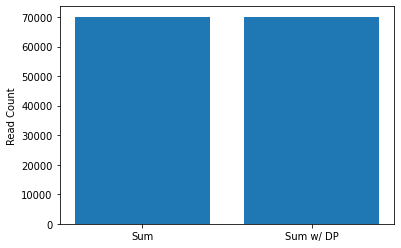

In [ ]:
# Function to calculate sum of read count without applying differential privacy.
def df3_sum_read_count() -> int:
    return df3.sum()[2]

# Function to calculate sum of read count applying differential privacy.
def df3_private_sum(privacy_budget: float) -> int:
    x = BoundedSum(epsilon=EPSILON, lower_bound = 50, upper_bound = 350, dtype = 'int')
    #x = BoundedSum(privacy_budget, 0, 1, 100, dtype="float")
    return x.quick_result(list(df3["read_count"]))


print("Sum for Data Set 3 : " + str(df3_sum_read_count()))
df3_dp_sum = df3_private_sum(1)
print("Private Sum for Data Set 3: " + str(df3_dp_sum))

ops = {
  "Sum": df1_sum_read_count(),
  "Sum w/ DP": df2_dp_sum
}

plt.xlabel("")
plt.ylabel("Read Count")

plt.bar(list(ops.keys()), list(ops.values()))

plt.show()

# Injection of Noise into the Read Count

Here we inject noise directly into read_count for all dataframes

In [ ]:
#TODO: Needs its own graph


grouped_data = df1
read_count = list(grouped_data['read_count'])
#print(read_count)
dp_read_count = list()

for data in read_count:
    x = Count(EPSILON)
    count = x.quick_result(list(range(1, data + 1)))
    dp_read_count.append(count)
grouped_data['dp_read_count'] = dp_read_count
grouped_data.to_csv('group_by_dept_study_level.csv')
dpdf1 = pd.read_csv('group_by_dept_study_level.csv')
dpdf1.head(50)





,Unnamed: 0,book_name,department,study_level,read_count,dp_read_count
0,1,20000 Leagues Under the Sea,COMPUTER_SCIENCE,GRAD,27,25
1,2,20000 Leagues Under the Sea,COMPUTER_SCIENCE,UNDERGRAD,11,11
2,3,20000 Leagues Under the Sea,DANCE,GRAD,21,19
3,4,20000 Leagues Under the Sea,DANCE,UNDERGRAD,18,18
4,5,20000 Leagues Under the Sea,ECONOMICS,GRAD,18,15
5,6,20000 Leagues Under the Sea,ECONOMICS,UNDERGRAD,29,29
6,7,20000 Leagues Under the Sea,ENGLISH,GRAD,20,20
7,8,20000 Leagues Under the Sea,ENGLISH,UNDERGRAD,19,16
8,9,20000 Leagues Under the Sea,MATHEMATICS,GRAD,19,20
9,10,20000 Leagues Under the Sea,MATHEMATICS,UNDERGRAD,27,27


In [ ]:
#TODO: Needs its own graph
grouped_data = df2
read_count = list(grouped_data['read_count'])
#print(read_count)
dp_read_count = list()

for data in read_count:
    x = Count(EPSILON)
    count = x.quick_result(list(range(1, data + 1)))
    dp_read_count.append(count)
grouped_data['dp_read_count'] = dp_read_count
grouped_data.to_csv('group_by_dept_dp.csv')
dpdf2 = pd.read_csv('group_by_dept_dp.csv')
dpdf2.head(10)


,Unnamed: 0,book_name,department,read_count,dp_read_count
0,1,20000 Leagues Under the Sea,COMPUTER_SCIENCE,38,37
1,2,20000 Leagues Under the Sea,DANCE,39,40
2,3,20000 Leagues Under the Sea,ECONOMICS,47,45
3,4,20000 Leagues Under the Sea,ENGLISH,39,39
4,5,20000 Leagues Under the Sea,MATHEMATICS,46,51
5,6,20000 Leagues Under the Sea,POLITICAL_SCIENCE,46,46
6,7,20000 Leagues Under the Sea,PSYCHOLOGY,48,48
7,8,20000 Leagues Under the Sea,STATISTICS,39,39
8,9,"Age of Discontuinity, The",COMPUTER_SCIENCE,46,49
9,10,"Age of Discontuinity, The",DANCE,37,37


In [ ]:
#TODO: Needs its own graph
grouped_data = df3
read_count = list(grouped_data['read_count'])
#print(read_count)
dp_read_count = list()

for data in read_count:
    x = Count(EPSILON)
    count = x.quick_result(list(range(1, data + 1)))
    dp_read_count.append(count)
grouped_data['dp_read_count'] = dp_read_count
grouped_data.to_csv('group_by_study_level_dp.csv')
dpdf3 = pd.read_csv('group_by_study_level_dp.csv')
dpdf3.head(10)

,Unnamed: 0,book_name,study_level,read_count,dp_read_count
0,1,20000 Leagues Under the Sea,GRAD,172,172
1,2,20000 Leagues Under the Sea,UNDERGRAD,170,171
2,3,"Age of Discontuinity, The",GRAD,181,184
3,4,"Age of Discontuinity, The",UNDERGRAD,160,160
4,5,"Age of the Warrior, The",GRAD,189,189
5,6,"Age of the Warrior, The",UNDERGRAD,167,165
6,7,"Age of Wrath, The",GRAD,168,167
7,8,"Age of Wrath, The",UNDERGRAD,183,185
8,9,Aghal Paghal,GRAD,184,184
9,10,Aghal Paghal,UNDERGRAD,169,167


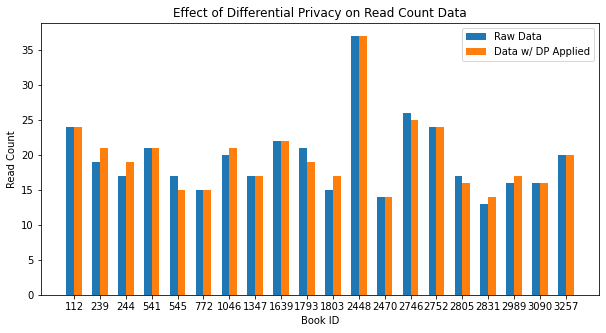

In [ ]:
grouped_data = df1
read_count = list(grouped_data['read_count'])
dp_read_count = list()

for data in read_count:
    x = Count(EPSILON)
    count = x.quick_result(list(range(1, data + 1)))
    dp_read_count.append(count)

grouped_data['dp_read_count'] = dp_read_count
grouped_data.to_csv('group_by_dept_study_level.csv')
dpdf1 = pd.read_csv('group_by_dept_study_level.csv')

# number of books
N = 20

# Position of bars on x-axis
ind = np.arange(N)

# Figure size
plt.figure(figsize=(10,5))

# Width of a bar 
width = 0.3

# label axes and graph
plt.xlabel('Book ID')
plt.ylabel('Read Count')
plt.title('Effect of Differential Privacy on Read Count Data')

# get random sample of books from the data frame
sample = dpdf1.sample(n=N).sort_index()

# plot
plt.bar(ind, list(sample["read_count"]) , width, label='Raw Data')
plt.bar(ind + width, list(sample["dp_read_count"]), width, label='Data w/ DP Applied')

plt.xticks(ind + width / 2, list(sample.index))

# Finding the best position for legends and putting it
plt.legend(loc='best')
plt.show()

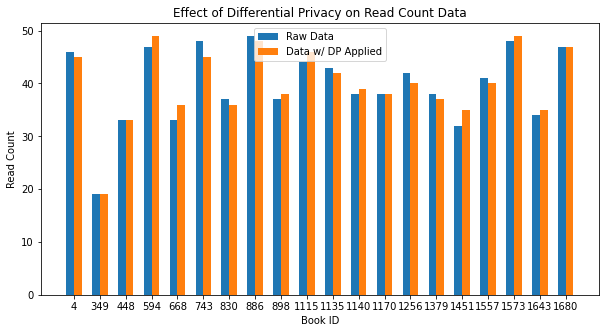

In [ ]:

grouped_data = df2
read_count = list(grouped_data['read_count'])
#print(read_count)
dp_read_count = list()

for data in read_count:
    x = Count(EPSILON)
    count = x.quick_result(list(range(1, data + 1)))
    dp_read_count.append(count)

grouped_data['dp_read_count'] = dp_read_count
grouped_data.to_csv('group_by_dept.csv')
dpdf2 = pd.read_csv('group_by_dept.csv')

# number of books
N = 20

# Position of bars on x-axis
ind = np.arange(N)

# Figure size
plt.figure(figsize=(10,5))

# Width of a bar 
width = 0.3

# label axes and graph
plt.xlabel('Book ID')
plt.ylabel('Read Count')
plt.title('Effect of Differential Privacy on Read Count Data')

# get random sample of books from the data frame
sample = dpdf2.sample(n=N).sort_index()

# plot
plt.bar(ind, list(sample["read_count"]) , width, label='Raw Data')
plt.bar(ind + width, list(sample["dp_read_count"]), width, label='Data w/ DP Applied')

plt.xticks(ind + width / 2, list(sample.index))

# Finding the best position for legends and putting it
plt.legend(loc='best')
plt.show()

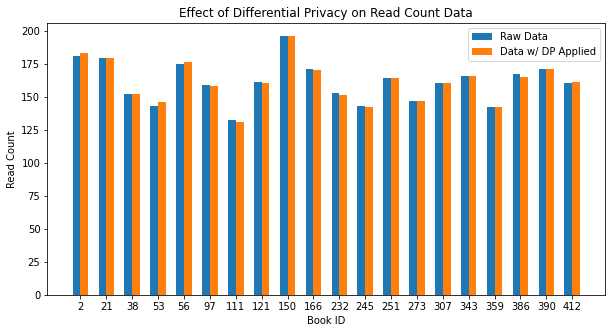

In [ ]:

grouped_data = df3
read_count = list(grouped_data['read_count'])
#print(read_count)
dp_read_count = list()

for data in read_count:
    x = Count(EPSILON)
    count = x.quick_result(list(range(1, data + 1)))
    dp_read_count.append(count)

grouped_data['dp_read_count'] = dp_read_count
grouped_data.to_csv('group_by_study_level.csv')
dpdf3 = pd.read_csv('group_by_study_level.csv')

# number of books
N = 20

# Position of bars on x-axis
ind = np.arange(N)

# Figure size
plt.figure(figsize=(10,5))

# Width of a bar 
width = 0.3

# label axes and graph
plt.xlabel('Book ID')
plt.ylabel('Read Count')
plt.title('Effect of Differential Privacy on Read Count Data')

# get random sample of books from the data frame
sample = dpdf3.sample(n=N).sort_index()

# plot
plt.bar(ind, list(sample["read_count"]) , width, label='Raw Data')
plt.bar(ind + width, list(sample["dp_read_count"]), width, label='Data w/ DP Applied')

plt.xticks(ind + width / 2, list(sample.index))

# Finding the best position for legends and putting it
plt.legend(loc='best')
plt.show()

In [ ]:
# get data from our public github repo
df = pd.read_csv("https://raw.githubusercontent.com/Obosie/LibraryCSV/main/group_by_dept_study_level.csv", sep=",", names=["book_name", "department","study_level","read_count"])
df = df.drop(labels=0, axis=0)
df["read_count"] = df1["read_count"].astype(int)
df.head(10)

,book_name,department,study_level,read_count
1,20000 Leagues Under the Sea,COMPUTER_SCIENCE,GRAD,27
2,20000 Leagues Under the Sea,COMPUTER_SCIENCE,UNDERGRAD,11
3,20000 Leagues Under the Sea,DANCE,GRAD,21
4,20000 Leagues Under the Sea,DANCE,UNDERGRAD,18
5,20000 Leagues Under the Sea,ECONOMICS,GRAD,18
6,20000 Leagues Under the Sea,ECONOMICS,UNDERGRAD,29
7,20000 Leagues Under the Sea,ENGLISH,GRAD,20
8,20000 Leagues Under the Sea,ENGLISH,UNDERGRAD,19
9,20000 Leagues Under the Sea,MATHEMATICS,GRAD,19
10,20000 Leagues Under the Sea,MATHEMATICS,UNDERGRAD,27


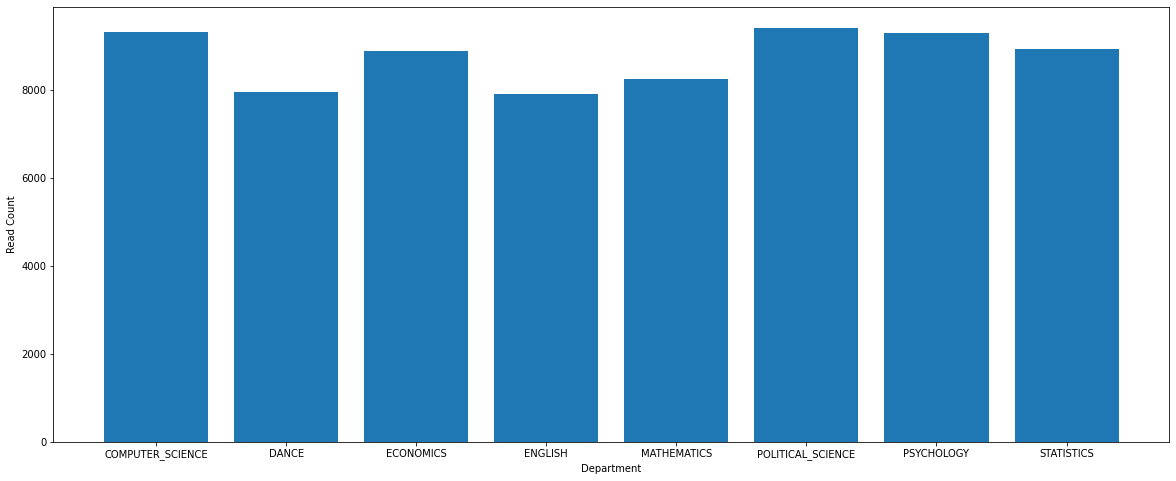

In [ ]:
# get read count by department
read_counts = {}
for index, book in df.iterrows():
  department = book["department"]
  if department in read_counts:
    read_counts[department] += book["read_count"]
  else:
    read_counts[department] = book["read_count"]

# increase height and width of figure
plt.figure(figsize=(20, 8)) 

plt.xlabel("Department")
plt.ylabel("Read Count")

plt.bar(list(read_counts.keys()), list(read_counts.values()))

plt.show()